In [52]:
%matplotlib inline

import numpy as np
import menpo.io as mio
from menpo.image import Image
from menpo.feature import greyscale, centralize, normalize_norm, normalize_std
from menpo.landmark import labeller, ibug_face_66
from menpo.visualize import visualize_images
from alaborticcv2015.deepconvkernel.generative import GenerativeLDCN, learn_ica_filters

# PCA LDCN 

Choose whether to work with color or greyscale images and whether to learn the filters from landmarks or regular grid:

In [5]:
color = False
landmarks = True

if color:
    n_channels = 3
else:
    n_channels = 1

In [24]:
images = []
for i in mio.import_images('/data/PhD/DataBases/faces/lfpw/**/*.png', verbose=True, 
                           max_images=50):
    i.crop_to_landmarks_proportion_inplace(0.5)
    i = i.rescale_landmarks_to_diagonal_range(100)
    i = greyscale(i)
    labeller(i, 'PTS', ibug_face_66)
    images.append(i)

- Loading 50 assets: [====================] 100%

Build 1-layer PCA LinDeepConvNets:

In [48]:
n_filters = range(4, 34, 4)
shapes = [s for s in range(3, 19, 2)]

In [49]:
for nf in n_filters:
    for s in shapes:
        net = GenerativeLDCN(learn_filters=learn_pca_filters, 
                             n_filters=np.minimum(nf, s * s -1) ,
                             n_layers=1,
                             architecture=3,
                             normalize_patches=centralize,
                             normalize_filters=None,
                             patch_shape=(s, s))
        if landmarks:
            net.learn_network_from_landmarks(images, group='ibug_face_66', verbose=True)
        else:
            net.learn_network_from_grid(images, stride=(4, 4), verbose=True)
            
        file_name = ('/data/PhD/Models/alaborticcv2015/pca_net/pca_net_1_'
                     + str(3)
                     + '_'
                     + str(nf) 
                     + '_' 
                     + str(s)
                     + '.pkl.gz') 
        mio.export_pickle(net, file_name, overwrite=True)

- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning network
  - Done!
- Learning net

Build 2-layers PCA LinDeepConvNets:

In [54]:
architectures = range(3)
n_filters = range(32, 34, 4)
shapes = [s for s in range(5, 7, 2)]

In [55]:
# for a in architectures:
for nf in n_filters:
    for s in shapes:
        net = GenerativeLDCN(learn_filters=learn_ica_filters, 
                             n_filters=8, 
                             n_layers=3,
                             architecture=3,
                             normalize_patches=centralize,
                             normalize_filters=None,
                             patch_shape=(s, s))
        if landmarks:
            net.learn_network_from_landmarks(images, group='ibug_face_66', verbose=True)
        else:
            net.learn_network_from_grid(images, stride=(4, 4), verbose=True)

        file_name = ('/data/PhD/Models/alaborticcv2015/pca_net/pca_net_2_' 
                     + str(3)
                     + '_'
                     + str(nf) 
                     + '_' 
                     + str(s)
                     + '.pkl.gz') 
        mio.export_pickle(net, file_name, overwrite=True)

- Learning network
  - Layer 0: Done!
  - Layer 1: Done!
  - Layer 2: Done!


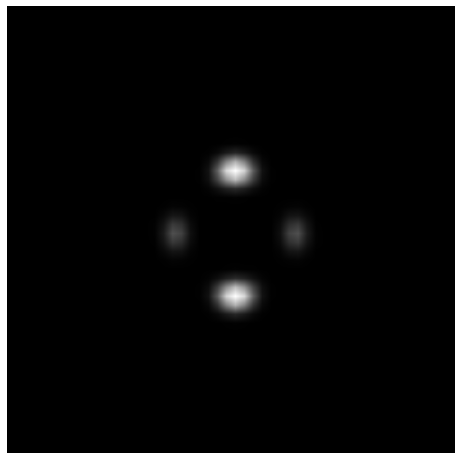

In [47]:
net.kernels_frequency((50,50))[-1].view()